# 2) Compare a representação de dois modelos vetoriais

## Utilizando word2vec

In [10]:
#Gensim do Colab não funciona tem que instalar e reiniciar
!pip install gensim nltk scikit-learn matplotlib numpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 64.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 85.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 15.5 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.14.1
    Uninstalling scipy-1.14.1:
      Successfully uninstalled scipy-1.14.1


In [11]:
# --- 0. Instalação e Imports (Necessário no Colab se não estiver pré-instalado) ---
# Descomente e execute as linhas !pip se receber erro de módulo não encontrado
# !pip install gensim nltk scikit-learn matplotlib numpy

import re # Para expressões regulares (limpeza de texto)
import numpy as np
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import matplotlib.cm as cm # Para gerar cores distintas para os pontos
import nltk

In [12]:
#pacotes necessários para o tokenizador
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [13]:
# Baixar o tokenizador 'punkt' do NLTK (necessário na primeira execução no ambiente)
try:
    nltk.data.find('tokenizers/punkt')
except nltk.downloader.DownloadError:
    print("Baixando o tokenizador 'punkt' do NLTK...")
    nltk.download('punkt', quiet=True)
    print("Download concluído.")

print("Bibliotecas importadas e NLTK pronto.")
print("-" * 40)

Bibliotecas importadas e NLTK pronto.
----------------------------------------


In [14]:
# --- 1. Definição dos Textos ---
# Mínimo 6 textos, com pelo menos 2 pares similares.
# Limitando a ~10-12 para clareza na visualização.
texts = [
    "O dia amanheceu ensolarado e agradável.",             # Clima 1
    "Esperamos um fim de semana de sol e céu azul.",       # Clima 2 (similar ao 1)
    "A culinária brasileira usa muitos ingredientes frescos.", # Culinária 1
    "Adoro comer frutas tropicais como manga e abacaxi.",  # Culinária/Frutas 2
    "Feijoada é um prato típico muito saboroso.",          # Culinária 3 (similar ao 3)
    "O gato dorme tranquilamente no sofá.",               # Animais 1
    "Cachorros precisam de passeios diários.",            # Animais 2
    "A noite está estrelada e silenciosa.",               # Clima/Noite 3 (ligeiramente similar ao 1/2)
    "As receitas de família guardam tradições.",          # Culinária 4 (similar ao 3/5)
    "Os cães são animais leais e companheiros.",         # Animais 3 (similar ao 7)
]

# Garantir que não exceda um limite razoável para o plot
max_texts_to_plot = 12
if len(texts) > max_texts_to_plot:
    print(f"Limitando a {max_texts_to_plot} textos para visualização.")
    texts = texts[:max_texts_to_plot]

print(f"Textos de entrada ({len(texts)}):")
for i, t in enumerate(texts):
    print(f"{i}: {t}")
print("-" * 40)

Textos de entrada (10):
0: O dia amanheceu ensolarado e agradável.
1: Esperamos um fim de semana de sol e céu azul.
2: A culinária brasileira usa muitos ingredientes frescos.
3: Adoro comer frutas tropicais como manga e abacaxi.
4: Feijoada é um prato típico muito saboroso.
5: O gato dorme tranquilamente no sofá.
6: Cachorros precisam de passeios diários.
7: A noite está estrelada e silenciosa.
8: As receitas de família guardam tradições.
9: Os cães são animais leais e companheiros.
----------------------------------------


In [15]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [16]:
# --- 2. Pré-processamento ---
def preprocess_text(text):
    """Limpa e tokeniza o texto."""
    # Converte para minúsculas
    text = text.lower()
    # Remove pontuações básicas e números (opcional, mas ajuda a focar nas palavras)
    text = re.sub(r'[^\w\s]', '', text) # Remove pontuação
    text = re.sub(r'\d+', '', text)      # Remove números
    # Tokeniza (divide em palavras)
    tokens = nltk.word_tokenize(text, language='portuguese') # Especificar idioma ajuda
    # Remove palavras vazias (stopwords) - Opcional, pode ou não ajudar com poucos dados
    from nltk.corpus import stopwords
    nltk.download('stopwords') # Se for usar
    stop_words = set(stopwords.words('portuguese'))
    tokens = [word for word in tokens if word not in stop_words and len(word) > 1] # Remove stopwords e palavras de 1 letra
    tokens = [word for word in tokens if len(word) > 1] # Apenas remove palavras de 1 letra
    return tokens

tokenized_texts = [preprocess_text(t) for t in texts]

print("Textos Tokenizados (Exemplo do primeiro):")
print(tokenized_texts[0])
print("-" * 40)

Textos Tokenizados (Exemplo do primeiro):
['dia', 'amanheceu', 'ensolarado', 'agradável']
----------------------------------------


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /ro

In [17]:
# --- 3. Treinamento do Modelo Word2Vec ---
# Parâmetros importantes para datasets pequenos:
# min_count=1: Inclui todas as palavras. Essencial aqui.
# epochs: Aumentar o número de épocas de treino.
# vector_size: Dimensão dos vetores (100 é comum, mas 50 pode ser suficiente aqui).
# window: Contexto de palavras vizinhas.
# sg=1: Usa Skip-gram (geralmente melhor para datasets menores).

vector_dim = 50  # Dimensão dos vetores de palavras
w2v_model = Word2Vec(sentences=tokenized_texts,
                     vector_size=vector_dim,
                     window=3,         # Janela menor pode ser melhor para frases curtas
                     min_count=1,      # Crucial para datasets pequenos
                     workers=4,        # Número de threads (ajuste conforme CPU disponível no Colab)
                     sg=1,             # Skip-gram
                     epochs=100)       # Mais épocas para compensar poucos dados

print("Modelo Word2Vec treinado.")
print(f"Tamanho do vocabulário: {len(w2v_model.wv.index_to_key)}")
# Exemplo: Palavras mais similares a 'sol' (se 'sol' estiver no vocabulário)
try:
    similar_words = w2v_model.wv.most_similar('sol', topn=3)
    print(f"Palavras mais similares a 'sol': {similar_words}")
except KeyError:
    print("Palavra 'sol' não encontrada no vocabulário (corpus muito pequeno).")
print("-" * 40)


Modelo Word2Vec treinado.
Tamanho do vocabulário: 45
Palavras mais similares a 'sol': [('culinária', 0.5437578558921814), ('sofá', 0.435198038816452), ('leais', 0.4049411416053772)]
----------------------------------------


In [18]:
# --- 4. Cálculo dos Vetores de Sentenças ---
# Estratégia: Média dos vetores das palavras na sentença

def get_sentence_vector(tokens, model, vector_size):
    """Calcula o vetor médio para uma lista de tokens."""
    vector = np.zeros(vector_size)
    count = 0
    for word in tokens:
        if word in model.wv: # Checa se a palavra está no vocabulário do modelo
            vector += model.wv[word]
            count += 1
    if count > 0:
        vector /= count # Calcula a média
    # else: # Opcional: Lidar com sentenças onde nenhuma palavra está no vocabulário
    #     print(f"Aviso: Sentença com tokens '{tokens}' não possui palavras no vocabulário.")
    return vector
# Calcula o vetor para cada texto tokenizado
sentence_vectors = np.array([get_sentence_vector(tokens, w2v_model, vector_dim)
                             for tokens in tokenized_texts])

print(f"Vetores das sentenças calculados. Shape: {sentence_vectors.shape}")
# Verificar se há vetores nulos (indicativo de problemas)
if np.any(np.all(sentence_vectors == 0, axis=1)):
    print("AVISO: Uma ou mais sentenças resultaram em vetor nulo (nenhuma palavra no vocabulário?).")
print("-" * 40)



Vetores das sentenças calculados. Shape: (10, 50)
----------------------------------------


In [19]:
# --- 5. Redução de Dimensionalidade com PCA ---
# Reduzir os vetores de 'vector_dim' dimensões para 2 dimensões para plotagem

pca = PCA(n_components=2, random_state=42) # random_state para reprodutibilidade
pca_result = pca.fit_transform(sentence_vectors)

print(f"Vetores reduzidos para 2D com PCA. Shape: {pca_result.shape}")
print("Componentes Principais (x, y) para cada sentença:")
for i, (x, y) in enumerate(pca_result):
    print(f"Texto {i}: ({x:.4f}, {y:.4f})")
print("-" * 40)

Vetores reduzidos para 2D com PCA. Shape: (10, 2)
Componentes Principais (x, y) para cada sentença:
Texto 0: (0.0127, -0.0075)
Texto 1: (-0.0106, -0.0045)
Texto 2: (0.0143, -0.0004)
Texto 3: (-0.0095, 0.0073)
Texto 4: (0.0268, -0.0175)
Texto 5: (-0.0049, -0.0185)
Texto 6: (0.0017, 0.0438)
Texto 7: (-0.0424, -0.0078)
Texto 8: (0.0093, 0.0124)
Texto 9: (0.0027, -0.0072)
----------------------------------------


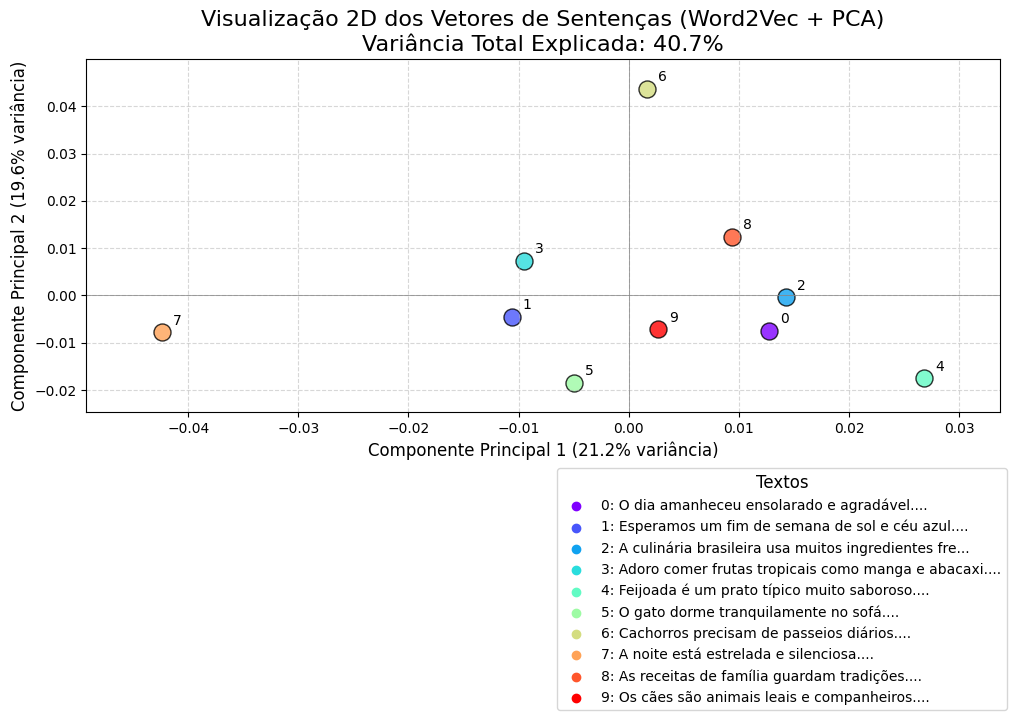


--- Interpretação do Gráfico ---
O gráfico acima mostra cada texto original como um ponto no espaço 2D.
A posição de cada ponto é determinada pelo vetor da sentença (média dos vetores das palavras) após a redução com PCA.
Textos com conteúdo semanticamente similar (segundo o modelo Word2Vec) devem aparecer mais próximos uns dos outros.
Com um corpus pequeno, as relações capturadas pelo Word2Vec podem ser fracas ou baseadas em coocorrências simples de palavras.


In [22]:
# --- 6. Visualização dos Vetores 2D ---
#
plt.figure(figsize=(12, 9)) # Ajuste o tamanho conforme necessário

# Gerar cores distintas para cada ponto usando um colormap
colors = cm.rainbow(np.linspace(0, 1, len(texts)))

# Plotar cada ponto (vetor 2D da sentença)
for i, (x, y) in enumerate(pca_result):
    plt.scatter(x, y, color=colors[i], s=150, alpha=0.8, edgecolors='k')
    # Adicionar anotação (número do texto) ligeiramente deslocado do ponto
    plt.text(x + 0.001, y + 0.001, str(i), fontsize=10, ha='left', va='bottom')

# Variância explicada
explained_variance_ratio = pca.explained_variance_ratio_
total_explained_variance = explained_variance_ratio.sum() * 100

plt.title(f'Visualização 2D dos Vetores de Sentenças (Word2Vec + PCA)\nVariância Total Explicada: {total_explained_variance:.1f}%', fontsize=16)
plt.xlabel(f'Componente Principal 1 ({explained_variance_ratio[0]*100:.1f}% variância)', fontsize=12)
plt.ylabel(f'Componente Principal 2 ({explained_variance_ratio[1]*100:.1f}% variância)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)

legend_handles = [plt.scatter([], [], color=colors[i], label=f'{i}: {texts[i][:50]}...')
                  for i in range(len(texts))]
plt.legend(handles=legend_handles, loc='center left', bbox_to_anchor=(0.5, -0.5),
           fontsize='medium', title="Textos", title_fontsize='large', borderaxespad=1.)

plt.margins(0.1)
plt.axhline(0, color='grey', lw=0.5)
plt.axvline(0, color='grey', lw=0.5)

plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.show()

print("\n--- Interpretação do Gráfico ---")
print("O gráfico acima mostra cada texto original como um ponto no espaço 2D.")
print("A posição de cada ponto é determinada pelo vetor da sentença (média dos vetores das palavras) após a redução com PCA.")
print("Textos com conteúdo semanticamente similar (segundo o modelo Word2Vec) devem aparecer mais próximos uns dos outros.")
print("Com um corpus pequeno, as relações capturadas pelo Word2Vec podem ser fracas ou baseadas em coocorrências simples de palavras.")